Dibujando escena inicial...


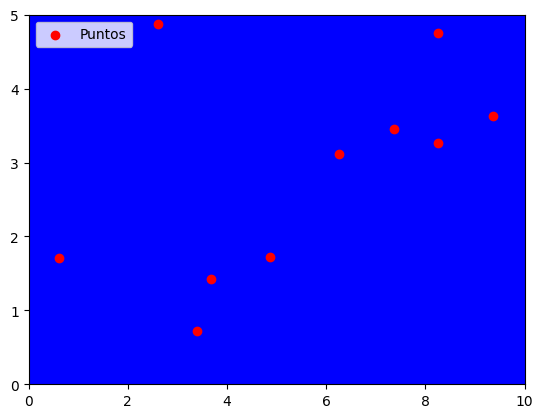

Desplazando puntos hacia la derecha...


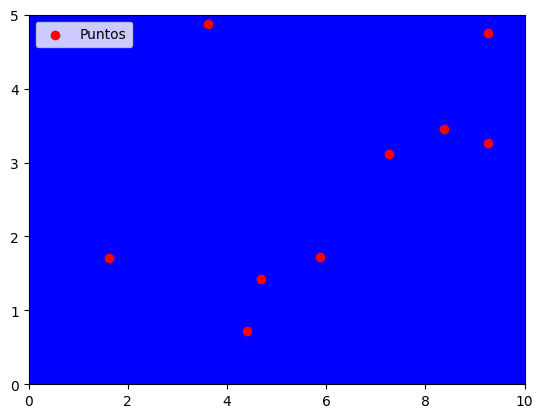

Animando puntos moviéndose hacia arriba...


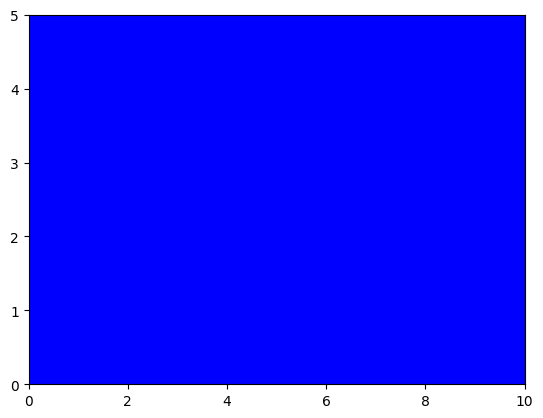

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from IPython.display import HTML, display

class Escena:
    def __init__(self, ancho, alto, color, n_puntos):
        """
        Inicializa una escena con un rectángulo de fondo y puntos aleatorios superpuestos.
        :param ancho: Ancho del rectángulo
        :param alto: Alto del rectángulo
        :param color: Color del rectángulo
        :param n_puntos: Número de puntos en la escena
        """
        self.ancho = ancho
        self.alto = alto
        self.color = color
        self.puntos = np.random.rand(n_puntos, 2) * [ancho, alto]

    def cambiar_escena(self, ancho, alto, color, n_puntos):
        """
        Modifica los atributos de la escena para crear una nueva configuración.
        """
        self.__init__(ancho, alto, color, n_puntos)

    def dibujar_escena(self):
        """
        Genera una representación gráfica de la escena actual.
        """
        fig, ax = plt.subplots()
        ax.set_xlim(0, self.ancho)
        ax.set_ylim(0, self.alto)
        rect = patches.Rectangle((0, 0), self.ancho, self.alto, color=self.color)
        ax.add_patch(rect)
        ax.scatter(self.puntos[:, 0], self.puntos[:, 1], color='red', label='Puntos')
        ax.legend()
        plt.show()

    def desplazar_puntos(self, valor, direccion):
        """
        Mueve los puntos en la dirección y magnitud especificadas.
        :param valor: Distancia del desplazamiento
        :param direccion: Dirección del movimiento ('derecha', 'izquierda', 'arriba', 'abajo')
        """
        desplazamientos = {
            'derecha': np.array([valor, 0]),
            'izquierda': np.array([-valor, 0]),
            'arriba': np.array([0, valor]),
            'abajo': np.array([0, -valor])
        }
        if direccion in desplazamientos:
            self.puntos += desplazamientos[direccion]

    def animar(self, velocidad, direccion):
        """
        Crea una animación que muestra el desplazamiento de los puntos en la dirección dada.
        :param velocidad: Magnitud del desplazamiento por cuadro
        :param direccion: Dirección del movimiento ('derecha', 'izquierda', 'arriba', 'abajo')
        """
        fig, ax = plt.subplots()
        ax.set_xlim(0, self.ancho)
        ax.set_ylim(0, self.alto)
        rect = patches.Rectangle((0, 0), self.ancho, self.alto, color=self.color)
        ax.add_patch(rect)
        scatter = ax.scatter(self.puntos[:, 0], self.puntos[:, 1], color='red')

        desplazamiento = {
            'derecha': np.array([velocidad, 0]),
            'izquierda': np.array([-velocidad, 0]),
            'arriba': np.array([0, velocidad]),
            'abajo': np.array([0, -velocidad])
        }.get(direccion, np.array([0, 0]))

        def update(frame):
            self.puntos[:] += desplazamiento
            scatter.set_offsets(self.puntos)
            return scatter,

        ani = animation.FuncAnimation(fig, update, frames=20, interval=100, blit=True)
        return HTML(ani.to_jshtml())

# Ejemplo de uso
if __name__ == "__main__":
    escena = Escena(10, 5, 'blue', 10)
    print("Dibujando escena inicial...")
    escena.dibujar_escena()
    print("Desplazando puntos hacia la derecha...")
    escena.desplazar_puntos(1, 'derecha')
    escena.dibujar_escena()
    print("Animando puntos moviéndose hacia arriba...")
    display(escena.animar(0.5, 'arriba'))
